In [118]:
import pandas as pd
from categorical_embeddings.embedder import Embedder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [119]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Modelo como baseline usando OneHotEncoding

In [120]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [121]:
data = pd.get_dummies(data)

In [122]:
train, test = train_test_split(data,train_size=0.7, random_state=1)
train.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
744,50,26.41,0,8827.2099,0,1,1,0,0,1,0,0
363,21,26.40,1,2597.7790,1,0,1,0,0,0,0,1
10,25,26.22,0,2721.3208,0,1,1,0,1,0,0,0
970,50,28.16,3,10702.6424,1,0,1,0,0,0,1,0
634,51,39.70,1,9391.3460,0,1,1,0,0,0,0,1


In [123]:
train_cols = [x for x in train.columns if x != "charges"]

In [124]:
import xgboost as xgb

In [125]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear',
                          colsample_bytree = 0.8, 
                          learning_rate = 0.02,
                          max_depth = 8, 
                          alpha = 10, 
                          n_estimators = 200,
                          nthread=-1,
                          silent=True)

In [126]:
xg_reg.fit(train[train_cols],train['charges'])

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.02, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [127]:
preds = xg_reg.predict(test[[x for x in test.columns if x !="charges"]])
y_test = test['charges']

In [128]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
mae = mean_absolute_error(y_test, preds)
mape = mean_absolute_percentage_error(y_test, preds)
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))
print("MAPE: %f" % (mape))

RMSE: 4753.472272
MAE: 2569.045334
MAPE: 32.789200


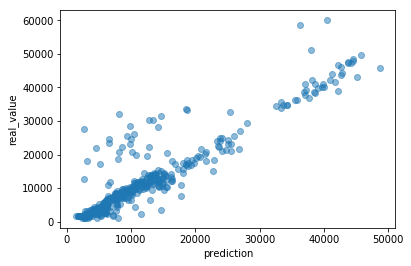

In [129]:
import matplotlib.pyplot as plt
plt.scatter(preds, y_test, alpha=0.5)
plt.xlabel('prediction')
plt.ylabel('real_value')
plt.show()

### Modelo como baseline usando LabelEncoding

In [130]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [131]:
label_encoder = LabelEncoder()

In [132]:
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['region'] = label_encoder.fit_transform(data['region'])

In [133]:
train, test = train_test_split(data,train_size=0.7, random_state=1)
train.head()

,age,sex,bmi,children,smoker,region,charges
744,50,1,26.41,0,0,1,8827.2099
363,21,0,26.40,1,0,3,2597.7790
10,25,1,26.22,0,0,0,2721.3208
970,50,0,28.16,3,0,2,10702.6424
634,51,1,39.70,1,0,3,9391.3460


In [134]:
train.shape

(936, 7)

In [135]:
train_cols = [x for x in train.columns if x != "charges"]

In [136]:
import xgboost as xgb

In [137]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear',
                          colsample_bytree = 0.8, 
                          learning_rate = 0.02,
                          max_depth = 8, 
                          alpha = 10, 
                          n_estimators = 200,
                          nthread=-1,
                          silent=True)

In [138]:
xg_reg.fit(train[train_cols],train['charges'])

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.02, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [139]:
preds = xg_reg.predict(test[[x for x in test.columns if x !="charges"]])
y_test = test['charges']

In [140]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
mae = mean_absolute_error(y_test, preds)
mape = mean_absolute_percentage_error(y_test, preds)
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))
print("MAPE: %f" % (mape))

RMSE: 5287.389072
MAE: 3319.755563
MAPE: 43.749437


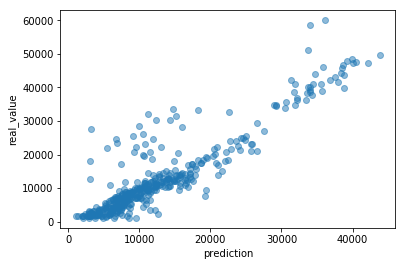

In [141]:
import matplotlib.pyplot as plt
plt.scatter(preds, y_test, alpha=0.5)
plt.xlabel('prediction')
plt.ylabel('real_value')
plt.show()

### Modelo usando Embeddings

In [142]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [143]:
emb = Embedder(target_type="regression")

In [144]:
data = emb.fit_transform(data, y="charges")

100%|██████████| 3/3 [00:05<00:00,  2.03s/it]


In [145]:
data.head()

,age,sex,bmi,children,smoker,region,charges,sex_1,sex_2,smoker_1,smoker_2,region_1,region_2
0,19,female,27.900,0,yes,southwest,16884.92400,0.036263,0.038584,0.007813,-0.009218,0.004420,-0.043208
1,18,male,33.770,1,no,southeast,1725.55230,-0.019575,-0.003305,-0.026399,0.026184,0.014419,0.006116
2,28,male,33.000,3,no,southeast,4449.46200,-0.019575,-0.003305,-0.026399,0.026184,0.014419,0.006116
3,33,male,22.705,0,no,northwest,21984.47061,-0.019575,-0.003305,-0.026399,0.026184,0.026409,-0.023586
4,32,male,28.880,0,no,northwest,3866.85520,-0.019575,-0.003305,-0.026399,0.026184,0.026409,-0.023586


In [146]:
data.drop(labels=['sex','smoker','region'], axis=1, inplace=True)

In [147]:
train, test = train_test_split(data,train_size=0.7, random_state=1)
train.head()

,age,bmi,children,charges,sex_1,sex_2,smoker_1,smoker_2,region_1,region_2
744,50,26.41,0,8827.2099,-0.019575,-0.003305,-0.026399,0.026184,0.026409,-0.023586
363,21,26.40,1,2597.7790,0.036263,0.038584,-0.026399,0.026184,0.004420,-0.043208
10,25,26.22,0,2721.3208,-0.019575,-0.003305,-0.026399,0.026184,0.028622,-0.026401
970,50,28.16,3,10702.6424,0.036263,0.038584,-0.026399,0.026184,0.014419,0.006116
634,51,39.70,1,9391.3460,-0.019575,-0.003305,-0.026399,0.026184,0.004420,-0.043208


In [148]:
train_cols = [x for x in train.columns if x != "charges"]

In [149]:
import xgboost as xgb

In [150]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear',
                          colsample_bytree = 0.8, 
                          learning_rate = 0.02,
                          max_depth = 8, 
                          alpha = 10, 
                          n_estimators = 200,
                          nthread=-1,
                          silent=True)

In [151]:
xg_reg.fit(train[train_cols],train['charges'])

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.02, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [152]:
preds = xg_reg.predict(test[[x for x in test.columns if x !="charges"]])
y_test = test['charges']

In [153]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
mae = mean_absolute_error(y_test, preds)
mape = mean_absolute_percentage_error(y_test, preds)
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))
print("MAPE: %f" % (mape))

RMSE: 4766.585166
MAE: 2545.909524
MAPE: 31.559158


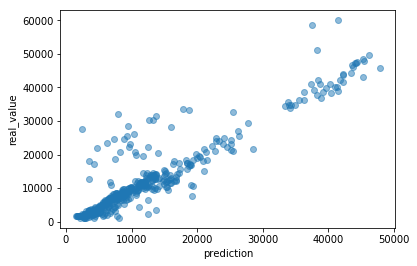

In [154]:
import matplotlib.pyplot as plt
plt.scatter(preds, y_test, alpha=0.5)
plt.xlabel('prediction')
plt.ylabel('real_value')
plt.show()